10) Data Visualization III
Download the Iris flower dataset or any other dataset into a DataFrame. (e.g.,
https://archive.ics.uci.edu/ml/datasets/Iris ). Scan the dataset and give the inference as:
1. List down the features and their types (e.g., numeric, nominal) available in the dataset.
2. Create a histogram for each feature in the dataset to illustrate the feature distributions.
3. Create a boxplot for each feature in the dataset.
4. Compare distributions and identify outliers. 

In [7]:
# ------------------------------------------------
# 📚 PRACTICAL 10: Data Visualization III
# ------------------------------------------------

# 1. Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# to load iris dataset if not download
from sklearn.datasets import load_iris


In [9]:
# Step 2: Load the Iris dataset
iris = load_iris()

# Step 3: Create a DataFrame using Iris data
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add target species names into a new column
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# ----------------------------------------
# if already downloaded then import
# ----------------------------------------

# df = pd.read_csv("Iris.csv")
# # iris_df = sns.load_dataset('iris')....for online loading
# df.head()

In [10]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
# Step 4: List down the features and their types
print("Features and their types:\n")
for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        print(f"{column} --> Numeric")
    else:
        print(f"{column} --> Nominal")

Features and their types:

sepal length (cm) --> Numeric
sepal width (cm) --> Numeric
petal length (cm) --> Numeric
petal width (cm) --> Numeric
species --> Nominal



Creating Histograms for each feature...


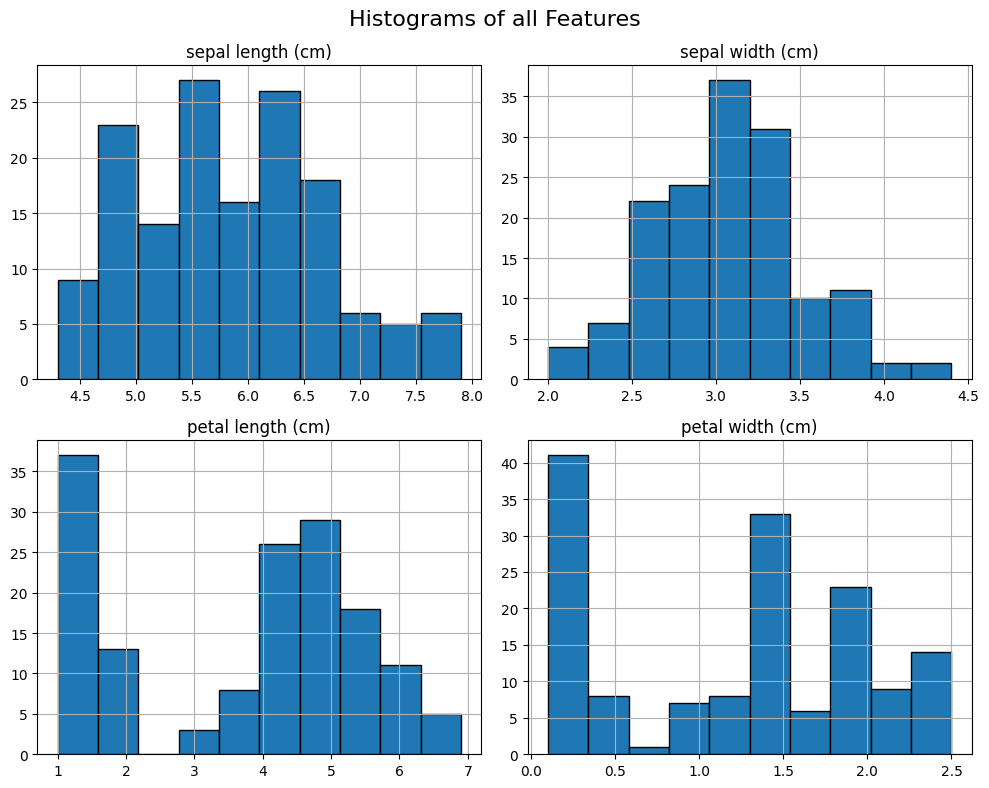

In [12]:
# ----------------------------------------
# 2. Create Histograms for each feature
# ----------------------------------------

print("\nCreating Histograms for each feature...")

# Plot histogram
df.hist(figsize=(10, 8), edgecolor='black')
plt.suptitle("Histograms of all Features", fontsize=16)
plt.tight_layout()
plt.show()


Creating Boxplots for each feature...


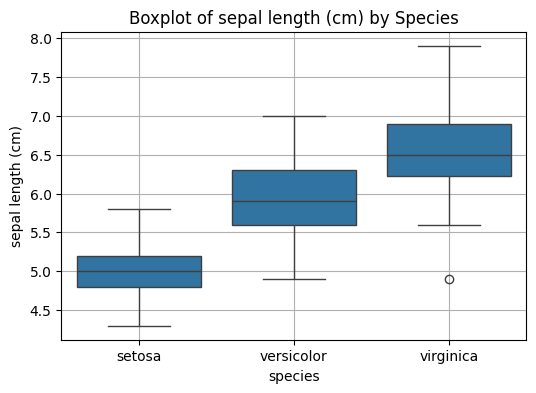

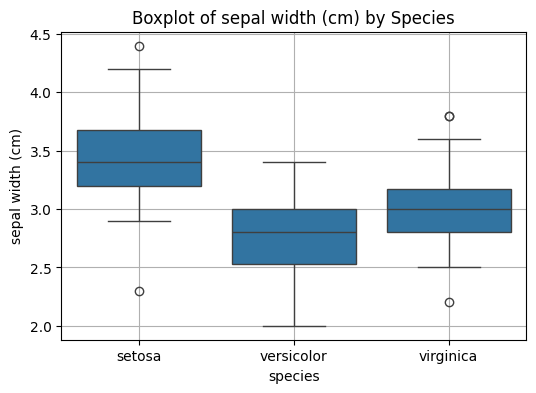

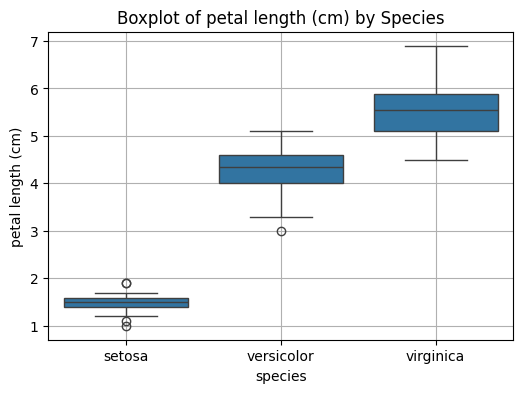

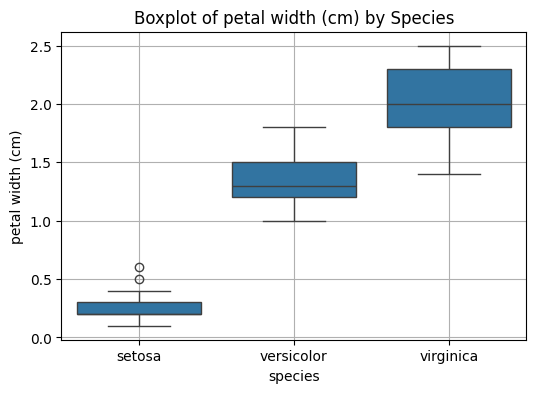

In [13]:
# ----------------------------------------
# 3. Create Boxplots for each feature
# ----------------------------------------

print("\nCreating Boxplots for each feature...")

# Create boxplots feature by feature
for column in iris.feature_names:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='species', y=column, data=df)
    plt.title(f"Boxplot of {column} by Species")
    plt.grid(True)
    plt.show()

In [15]:
# ----------------------------------------
# 4. Compare distributions and Identify Outliers
# ----------------------------------------

print("\nChecking for Outliers using IQR method:")

# Outlier detection using Interquartile Range (IQR)
for column in iris.feature_names:
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                   # IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR     # Lower fence
    upper_bound = Q3 + 1.5 * IQR     # Upper fence

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    if outliers.empty:
        print(f"{column}: No significant outliers found.")
    else:
        print(f"{column}: {len(outliers)} outlier(s) found.")


Checking for Outliers using IQR method:
sepal length (cm): No significant outliers found.
sepal width (cm): 4 outlier(s) found.
petal length (cm): No significant outliers found.
petal width (cm): No significant outliers found.


Here's a detailed theory explanation that covers all the concepts, functions, and their purposes in the code. This should help you prepare for your viva!

---

### **Detailed Theory Explanation:**

#### **1. Importing Necessary Libraries**
```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
```
- **`pandas` (pd)**: This library is essential for data manipulation and analysis. It provides data structures like DataFrames, which make handling data easier.
- **`matplotlib.pyplot` (plt)**: A plotting library used for creating static, animated, and interactive visualizations in Python. We use this for generating histograms and other basic plots.
- **`seaborn` (sns)**: Built on top of matplotlib, Seaborn makes it easier to create more advanced plots with better aesthetics. It is specifically used for boxplots in the code.
- **`load_iris`**: A function from scikit-learn that loads the Iris dataset, which is commonly used for machine learning and data visualization tasks.

---

#### **2. Loading the Iris Dataset**
```python
iris = load_iris()
```
- **`load_iris()`**: This function from `sklearn.datasets` loads the Iris dataset, which contains 150 samples of iris flowers, each having 4 features (sepal length, sepal width, petal length, petal width) and a target label indicating the species of the flower (Setosa, Versicolor, or Virginica).

---

#### **3. Creating a DataFrame**
```python
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
```
- **`pd.DataFrame()`**: This function converts the raw data (iris.data) into a DataFrame, a two-dimensional table-like data structure. The `columns=iris.feature_names` argument ensures that the columns are labeled with the feature names (sepal length, sepal width, etc.).
- **`df['species']`**: This adds a new column 'species' to the DataFrame to indicate the flower species for each data point. The species are represented by categorical values using the `pd.Categorical.from_codes()` function, which maps the numeric target labels to the corresponding species names.

---

#### **4. Listing Features and Their Types**
```python
for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        print(f"{column} - Numeric")
    else:
        print(f"{column} - Nominal")
```
- **`df.columns`**: This returns the column names of the DataFrame, which are the feature names in this case.
- **`df[column].dtype`**: This checks the data type of each column. If the data type is `float64` or `int64`, it means the column contains numeric data; otherwise, it is categorical (nominal).
  - **Numeric features**: These are continuous values that can be measured, like sepal length and petal width.
  - **Nominal features**: These are categorical variables without any inherent order, like the 'species' column.

---

#### **5. Creating Histograms for Each Feature**
```python
df.hist(figsize=(10, 8), edgecolor='black')
plt.suptitle("Histograms of all Features", fontsize=16)
plt.tight_layout()
plt.show()
```
- **`df.hist()`**: This function automatically generates a histogram for each numeric feature in the DataFrame. It helps visualize the distribution of data for each feature.
  - **`figsize=(10, 8)`**: This specifies the size of the entire plot (width x height).
  - **`edgecolor='black'`**: Adds a black border around each bar in the histogram for better clarity.
  - **`plt.suptitle()`**: Adds a title to the overall figure.
  - **`plt.tight_layout()`**: Adjusts the spacing of subplots to prevent overlap.
  - **`plt.show()`**: Displays the plot.

---

#### **6. Creating Boxplots for Each Feature**
```python
for column in iris.feature_names:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='species', y=column, data=df)
    plt.title(f"Boxplot of {column} by Species")
    plt.grid(True)
    plt.show()
```
- **`sns.boxplot()`**: This function from Seaborn creates a boxplot for each feature. A boxplot displays the median, quartiles, and potential outliers of the data.
  - **`x='species'`**: The categorical variable (species) is used for the x-axis.
  - **`y=column`**: The numerical feature is plotted on the y-axis.
  - **`data=df`**: Specifies that the data is coming from the `df` DataFrame.
- **`plt.figure(figsize=(6, 4))`**: Specifies the size of each individual boxplot.
- **`plt.title()`**: Adds a title to each boxplot indicating which feature is being visualized.
- **`plt.grid(True)`**: Enables a grid on the plot for better readability.
- **`plt.show()`**: Displays the boxplot.

---

#### **7. Identifying Outliers Using IQR**
```python
for column in iris.feature_names:
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                   # IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR     # Lower fence
    upper_bound = Q3 + 1.5 * IQR     # Upper fence

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    if outliers.empty:
        print(f"{column}: No significant outliers found.")
    else:
        print(f"{column}: {len(outliers)} outlier(s) found.")
```
- **`df[column].quantile()`**: This function calculates the specified percentile (25th percentile `Q1` and 75th percentile `Q3`) of the feature.
- **`IQR = Q3 - Q1`**: The **Interquartile Range (IQR)** is the difference between the 75th and 25th percentiles. It measures the spread of the middle 50% of the data.
- **Lower and Upper Bound**:
  - **`lower_bound = Q1 - 1.5 * IQR`**: Any data point below this lower bound is considered a potential outlier.
  - **`upper_bound = Q3 + 1.5 * IQR`**: Any data point above this upper bound is also considered a potential outlier.
- **Outlier Detection**: The code filters out the data points that fall outside the lower and upper bounds and checks if there are any outliers.
- **`outliers.empty`**: This checks if the resulting DataFrame `outliers` is empty (i.e., no outliers).

---

### **Key Concepts and Functions to Explain:**
1. **Histograms**: Used to show the distribution of numerical features. The shape of the histogram helps identify if the data is normally distributed or skewed.
2. **Boxplots**: Used to show the median, interquartile range (IQR), and potential outliers in the data.
3. **Outlier Detection (IQR Method)**: A method for identifying extreme values in data using the 25th and 75th percentiles. Data points outside the range of [Q1 - 1.5*IQR, Q3 + 1.5*IQR] are considered outliers.

---

